# House Prices - Advanced Regression Techniques

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.impute import SimpleImputer

## 1. Importación de librerías y carga de datos

In [4]:
train = pd.read_csv("./info/train.csv")
test =  pd.read_csv("./info/test.csv")

In [7]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Objetivo principal:

**SalePrice**: El precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.

## Características generales de la propiedad:

- **MSSubClass**: La clase de edificio
- **MSZoning**: La clasificación general de zonificación
- **LotFrontage**: Pies lineales de calle conectados a la propiedad
- **LotArea**: Tamaño del lote en pies cuadrados
- **Street**: Tipo de acceso a la calle
- **Alley**: Tipo de acceso al callejón
- **LotShape**: Forma general de la propiedad
- **LandContour**: Planicie de la propiedad
- **Utilities**: Tipo de servicios públicos disponibles
- **LotConfig**: Configuración del lote
- **LandSlope**: Pendiente de la propiedad
- **Neighborhood**: Ubicaciones físicas dentro de los límites de la ciudad de Ames
- **Condition1** y **Condition2**: Proximidad a la carretera principal o ferrocarril

## Tipo y estilo de vivienda:

- **BldgType**: Tipo de vivienda
- **HouseStyle**: Estilo de la vivienda
- **OverallQual**: Calidad general del material y acabado
- **OverallCond**: Calificación general de la condición
- **YearBuilt**: Fecha de construcción original
- **YearRemodAdd**: Fecha de remodelación

## Características exteriores:

- **RoofStyle**: Tipo de techo
- **RoofMatl**: Material del techo
- **Exterior1st** y **Exterior2nd**: Revestimiento exterior de la casa
- **MasVnrType**: Tipo de revestimiento de mampostería
- **MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados
- **ExterQual**: Calidad del material exterior
- **ExterCond**: Condición actual del material en el exterior

## Características del sótano:

- **Foundation**: Tipo de cimientos
- **BsmtQual**: Altura del sótano
- **BsmtCond**: Condición general del sótano
- **BsmtExposure**: Paredes del sótano a nivel de jardín o con salida
- **BsmtFinType1** y **BsmtFinType2**: Calidad del área terminada del sótano
- **BsmtFinSF1** y **BsmtFinSF2**: Pies cuadrados terminados de tipo 1 y 2
- **BsmtUnfSF**: Pies cuadrados sin terminar del área del sótano
- **TotalBsmtSF**: Pies cuadrados totales del área del sótano

## Sistemas y comodidades:

- **Heating**: Tipo de calefacción
- **HeatingQC**: Calidad y condición de la calefacción
- **CentralAir**: Aire acondicionado central
- **Electrical**: Sistema eléctrico

## Áreas de vivienda:

- **1stFlrSF**: Pies cuadrados del primer piso
- **2ndFlrSF**: Pies cuadrados del segundo piso
- **LowQualFinSF**: Pies cuadrados terminados de baja calidad (todos los pisos)
- **GrLivArea**: Área habitable sobre el suelo en pies cuadrados

## Baños y habitaciones:

- **BsmtFullBath**: Baños completos en el sótano
- **BsmtHalfBath**: Medios baños en el sótano
- **FullBath**: Baños completos sobre el nivel del suelo
- **HalfBath**: Medios baños sobre el nivel del suelo
- **Bedroom**: Número de dormitorios sobre el nivel del sótano
- **Kitchen**: Número de cocinas
- **KitchenQual**: Calidad de la cocina
- **TotRmsAbvGrd**: Total de habitaciones sobre el nivel del suelo (no incluye baños)
- **Functional**: Calificación de funcionalidad del hogar

## Características adicionales:

- **Fireplaces**: Número de chimeneas
- **FireplaceQu**: Calidad de la chimenea
- **GarageType**: Ubicación del garaje
- **GarageYrBlt**: Año en que se construyó el garaje
- **GarageFinish**: Acabado interior del garaje
- **GarageCars**: Tamaño del garaje en capacidad de autos
- **GarageArea**: Tamaño del garaje en pies cuadrados
- **GarageQual**: Calidad del garaje
- **GarageCond**: Condición del garaje
- **PavedDrive**: Entrada de coches pavimentada
- **WoodDeckSF**: Área de terraza de madera en pies cuadrados
- **OpenPorchSF**: Área de porche abierto en pies cuadrados
- **EnclosedPorch**: Área de porche cerrado en pies cuadrados
- **3SsnPorch**: Área de porche de tres estaciones en pies cuadrados
- **ScreenPorch**: Área de porche con mosquitero en pies cuadrados
- **PoolArea**: Área de la piscina en pies cuadrados
- **PoolQC**: Calidad de la piscina
- **Fence**: Calidad de la cerca
- **MiscFeature**: Característica miscelánea no cubierta en otras categorías
- **MiscVal**: Valor en $ de la característica miscelánea

## Información de venta:

- **MoSold**: Mes de venta
- **YrSold**: Año de venta
- **SaleType**: Tipo de venta
- **SaleCondition**: Condición de la venta


In [6]:
# Mostramos la información de las Columnas por ver si cuadra con las del pdf y además podemos observar cuales de ellas 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
print(f"lenght test : {len(test)}, lenght train: {len(train)}, lenght total data: {len(test)+len(train)}")


lenght test : 1459, lenght train: 1460, lenght total data: 2919


In [111]:
# Como las operaciones de limpieza, transformación, creación de nuevo atributos, etc. que realicemos debemos aplicarlas también sobre el conjunto de 
# datos de evalución (test)
df = pd.concat([train, test], axis=0)
columnas = df.columns

In [18]:
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Mod,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Mod
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,MeadowV,MeadowV,Mitchel,MeadowV,MeadowV,MeadowV,MeadowV,Mitchel,Mitchel,Mitchel
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [113]:
total_data.isnull().sum()

# Ver la distribución de valores en las columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())
    print(f"Valores nulos: {df[col].isnull().sum()}")


Distribución de MSZoning:
MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Valores nulos: 4

Distribución de Street:
Street
Pave    2907
Grvl      12
Name: count, dtype: int64
Valores nulos: 0

Distribución de Alley:
Alley
Grvl    120
Pave     78
Name: count, dtype: int64
Valores nulos: 2721

Distribución de LotShape:
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64
Valores nulos: 0

Distribución de LandContour:
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
Valores nulos: 0

Distribución de Utilities:
Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Valores nulos: 2

Distribución de LotConfig:
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
Valores nulos: 0

Distribución de LandSlope:
LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64
Valores 

In [115]:
# Estamos sustituyendo los valores nulos de las columnas categoricas por el valor más frecuente (la moda)
imputer = SimpleImputer(strategy='most_frequent')
df[columnas_categoricas] = imputer.fit_transform(df[columnas_categoricas])
df[columnas_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   Alley          2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2919 non-null   object
 16  Exterior2nd    2919 non-null   object
 17  MasVnrType     2919 non-null   object
 18  ExterQual      2919 non-null   ob

In [131]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [123]:
# Identificar automáticamente columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Aplicar get_dummies
df_dummies = pd.get_dummies(df[columnas_categoricas])

# Unir con las columnas numéricas originales
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df_final = pd.concat([df[columnas_numericas], df_dummies], axis=1)

In [147]:
df_final

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,False,False,False,True,True,False,False,False,False,False
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,False,False,False,True,True,False,False,False,False,False
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,False,False,False,True,False,False,False,False,True,False


In [152]:
impt = SimpleImputer(missing_values=np.nan, strategy='mean')
df_test =  pd.DataFrame(impt.fit_transform(df), columns=columnas)
#df_imputed

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'

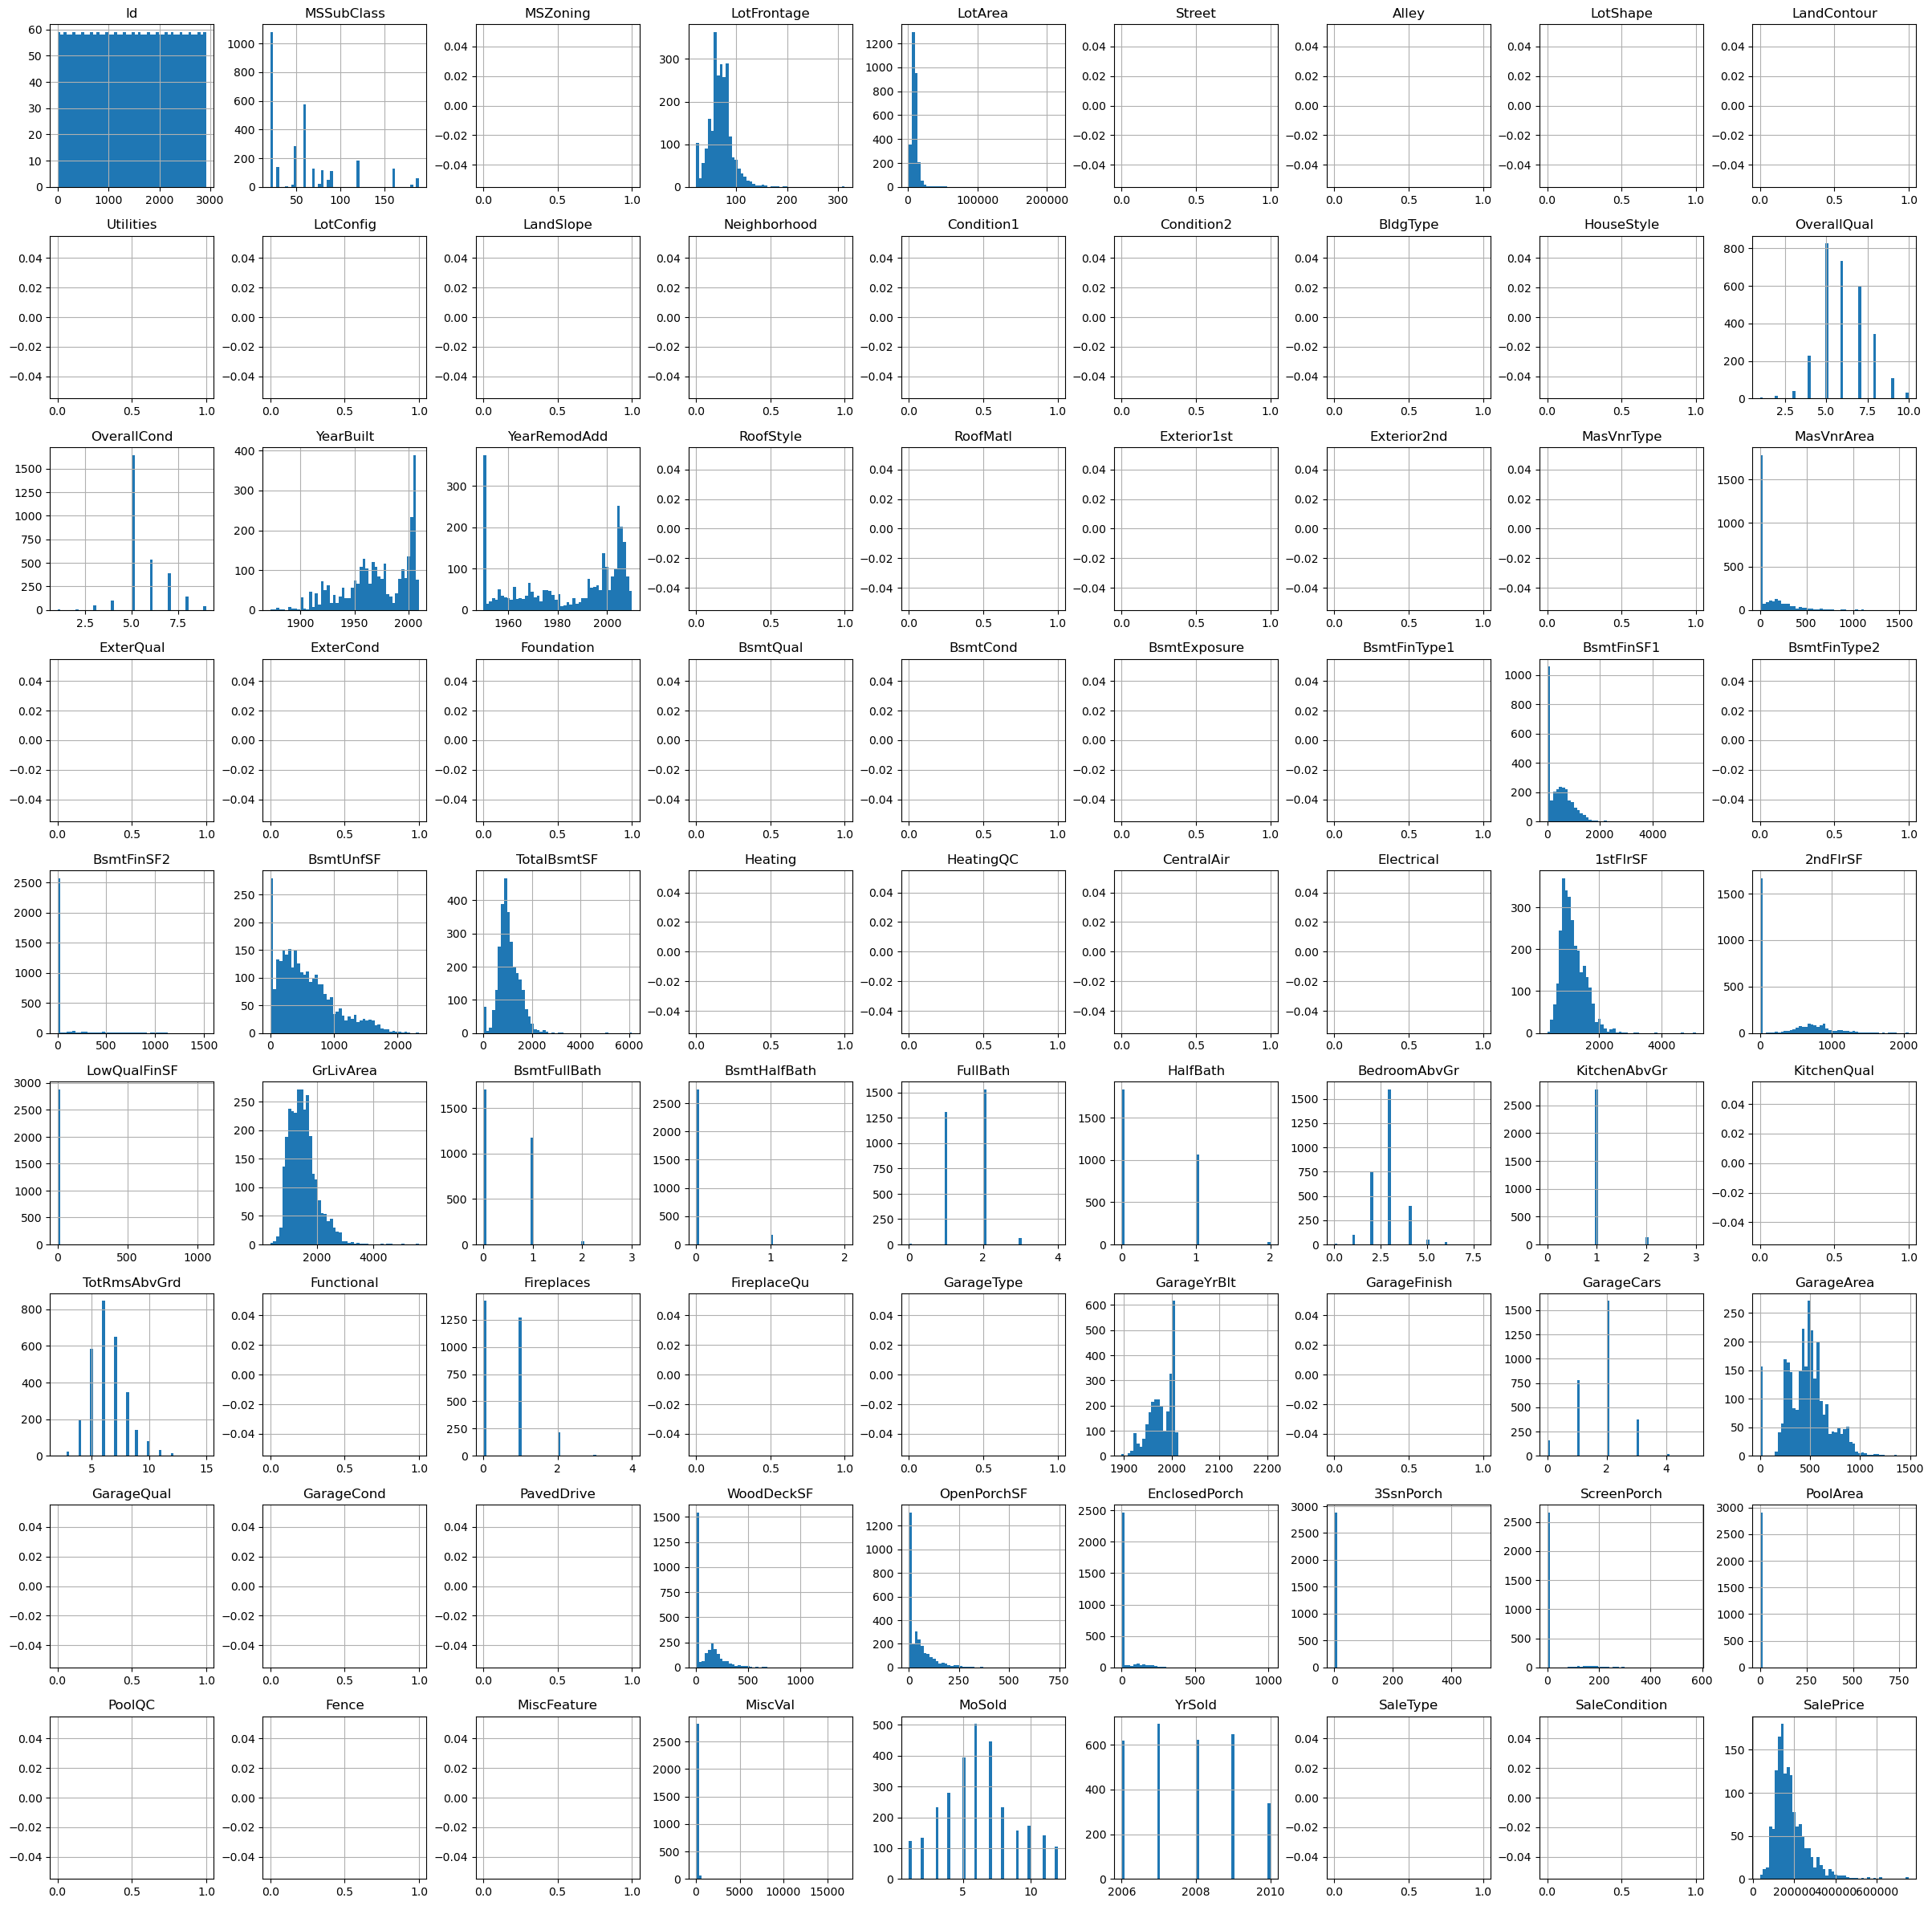

In [75]:
df.hist(bins=50, figsize=(30, 30))
plt.show()

<Axes: >

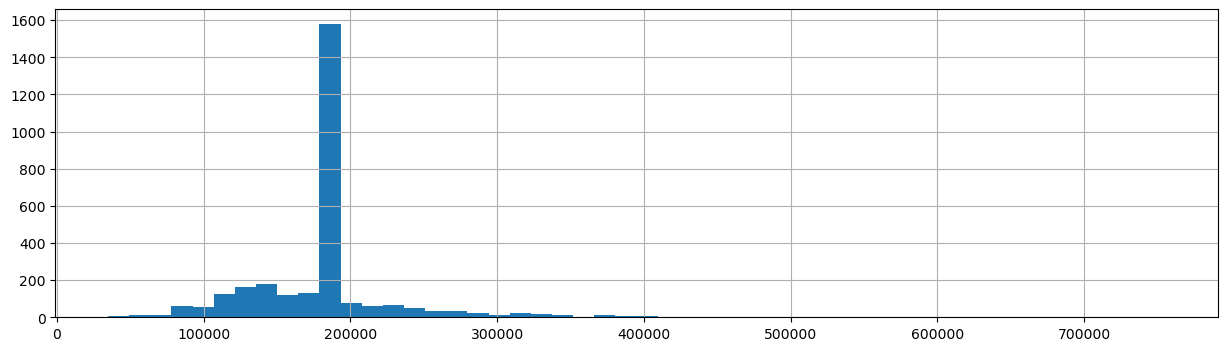

In [70]:
# El eje X representa el precio de venta en dólares, que va desde 0 hasta aproximadamente 600,000 dólares
# El eje Y representa la frecuencia, es decir, cuántas casas hay en cada rango de precio
df_imputed.SalePrice.hist(bins=50, figsize=(15, 4))

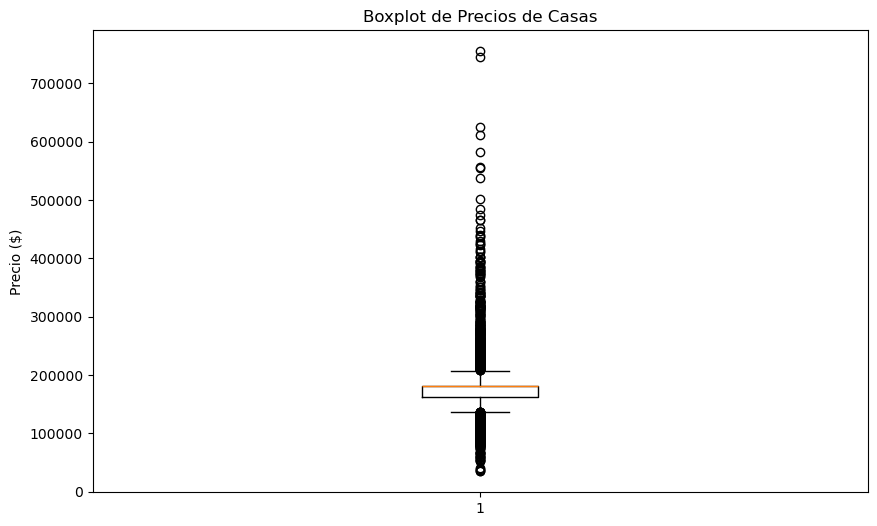

In [74]:
plt.figure(figsize=(10,6))
plt.boxplot(df_imputed.SalePrice)
plt.title('Boxplot de Precios de Casas')
plt.ylabel('Precio ($)')
plt.show()

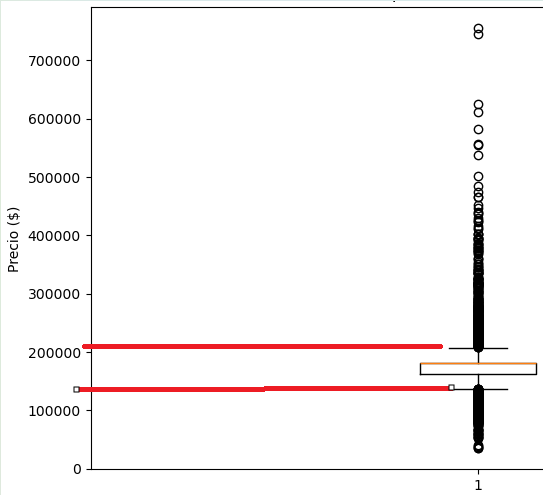

In [77]:
df_imputed.SalePrice.describe()

count      2919.000000
mean     180921.195890
std       56174.332503
min       34900.000000
25%      163000.000000
50%      180921.195890
75%      180921.195890
max      755000.000000
Name: SalePrice, dtype: float64

In [103]:
# Método del Rango Intercuartílico (IQR)---> Cálculo de outliers usando IQR
Q1 = df_imputed.SalePrice.quantile(0.25)
Q3 = df_imputed.SalePrice.quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Se consideran atípicos aquellas viviendas que no se encuentran entre el limite inferior: {limite_inferior.round(2)} y el limite superior: {limite_superior.round(2)}")

Se consideran atípicos aquellas viviendas que no se encuentran entre el limite inferior: 136118.21 y el limite superior: 207802.99


In [ ]:

## 1. Importación de librerías y carga de datos --> OK

## 2. Exploración inicial de los datos---> OK

### 2.1 Visión general del conjunto de datos
- Tamaño del conjunto de datos  ->> OK
- Tipos de datos ->> OK
- Resumen estadístico ->> OK

### 2.2 Análisis de valores faltantes
- Identificación de valores faltantes  -> OK
- Visualización de valores faltantes -> OK

## 3. Análisis de la variable objetivo (SalePrice)

### 3.1 Distribución de SalePrice
- Histograma --> OK
- Boxplot  -> OK
- Estadísticas descriptivas -> OK

### 3.2 Identificación de valores atípicos  --> OK

## 4. Análisis de características individuales

### 4.1 Variables numéricas
- Distribuciones
- Correlaciones con SalePrice

### 4.2 Variables categóricas
- Distribución de categorías
- Relación con SalePrice

## 5. Análisis de relaciones entre variables

### 5.1 Matriz de correlación
### 5.2 Pairplots para variables importantes
### 5.3 Análisis de relaciones no lineales

## 6. Preparación de datos

### 6.1 Manejo de valores faltantes
### 6.2 Transformación de variables
### 6.3 Codificación de variables categóricas
### 6.4 Creación de nuevas características

## 7. Selección de características

### 7.1 Importancia de características
### 7.2 Eliminación de características redundantes

## 8. Modelado

### 8.1 División de datos en entrenamiento y prueba
### 8.2 Selección de algoritmos de regresión
### 8.3 Entrenamiento de modelos
### 8.4 Evaluación inicial de modelos

## 9. Evaluación y ajuste del modelo

### 9.1 Análisis de rendimiento en datos de prueba
### 9.2 Diagnóstico de sobreajuste/subajuste
### 9.3 Ajuste de hiperparámetros

## 10. Interpretación de resultados

### 10.1 Importancia de características en el modelo final
### 10.2 Análisis de coeficientes/pesos del modelo

## 11. Validación y generalización

### 11.1 Validación cruzada
### 11.2 Discusión de limitaciones y posibles mejoras

## 12. Conclusiones y próximos pasos

```python
# Código final y resumen de hallazgos
```